### Neural Networks I

Die in Kapitel 04 eingeführte Softmax Regression/Multiclass Classification kann Daten nur linear separieren, wie in folgenden beiden Bildern illustriert: Die Daten (Features n=2, Klassen K=2) im linken Bild besitzen eine parabelförmige Trennlinie. Das rechte Bild zeigt die Hypothese einer Softmax-Klassifikation.

<img src="mc.png" height="100" width="500"/>

Als Beispiel betrachte wir folgende Daten ($K=2$ und $n=2$):

(2, 800)


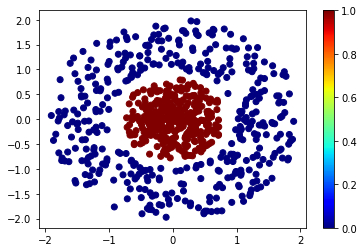

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 400
r = np.random.rand(1,N)
phi = np.random.rand(1,N)*2*np.pi

x1 = r*0.8*np.cos(phi)
y1 = r*0.8*np.sin(phi)
x2 = (r+1)*np.cos(phi)
y2 = (r+1)*np.sin(phi)

X = np.vstack([np.hstack([x1,x2]),np.hstack([y1,y2])])
y = np.zeros(2*N)
y[:N] = 1
print(X.shape)

plt.scatter(X[0,:],X[1,:],c=y,cmap=plt.cm.jet)
plt.colorbarü    

Diese Daten sind offesichtlich nicht linear separierbar. Wir unterziehen nun jeden Datenpunkt
$$
\vec{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$
mit der folgenden Transformation
$$
\vec{x} \quad \rightarrow \quad 
\vec{\phi}(\vec{x}) = \begin{pmatrix} \sqrt{x_1^2+x_2^2} \\ \mathrm{arctan}\frac{x_2}{x_1} \end{pmatrix} = 
\begin{pmatrix} \phi_1 \\ \phi_2 \end{pmatrix}\, ,
$$
Wir plotten die Daten in der $\phi_1-\phi_2$-Ebene:


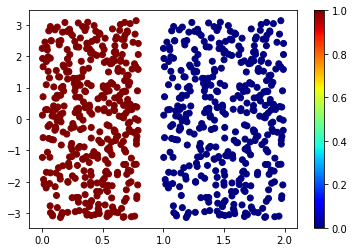

In [5]:
phi = np.zeros(X.shape)
phi[0,:] = np.sqrt(X[0,:]**2+X[1,:]**2)
phi[1,:] = np.arctan2(X[1,:],X[0,:])

plt.scatter(phi[0,:],phi[1,:],c=y,cmap=plt.cm.jet)
plt.colorbar()

Hier sind Daten nun offensichtlich linear separierbar.


Das grundlegende Ziel von Neuronalen Netzen ist es, ausgehend von den Rohdaten $\vec{x}$ eine **Datenrepresentation
$\vec{\phi}(\vec{x})$ zu lernen**, so dass diese linear separierbar ist.

### Forward-Propagation and Cost-Function

Zur Vereinfachung betrachten wir ein Netzwerk mit nur einem Hidden Layer mit 5 Neuronen (Zur Illustration verwenden wir n=4 und K=3).

<img src="nn.png" height="80" width="350"/>
Mit den beiden Matrizen
$$
\mathbf{W}_1 \in\mathbb{R}^{h\times n},\quad 
\mathbf{W}_2 \in\mathbb{R}^{K\times h}
$$

Die Forward Propagation wird wie folgt definiert:

$$
\vec{z}_1 = \mathbf{W}_1\vec{x}+\vec{b}_1 \\
\vec{a}_1 = \sigma(\vec{z_1}) \phantom{aaa}\\
\vec{z}_2 = \mathbf{W}_2\vec{a}_1+\vec{b}_2 \\
\vec{a}_2 = \mathrm{softmax}(\vec{z_2})
$$

Definieren wir wieder die Datenmatrix $\mathbf{X}$ und die Targetmatrix
$\mathbf{Y}$ als

$$
\mathbf{X} = \begin{pmatrix}\vec{x}^{(1)},\vec{x}^{(2)},\cdots,\vec{x}^{(m)} \end{pmatrix} 
\in\mathbb{R}^{n\times m}\qquad 
\mathbf{Y}\in\mathbb{R}^{K\times m}
$$

so erhalten wir folgende Matrix-Notation für die Forward-Propagation
$$
\mathbf{Z}_1 = \mathbf{W}_1\mathbf{X}+\mathbf{b}_1  \qquad(\mathbf{Z}_1\in\mathbb{R}^{h\times m})\phantom{a} \\
\mathbf{A}_1 = \sigma(\mathbf{Z_1}) \phantom{aaa}  \qquad(\mathbf{A}_1\in\mathbb{R}^{h\times m})\phantom{aa}\\
\mathbf{Z}_2 = \mathbf{W}_2\mathbf{A}_1+\mathbf{b}_2  \qquad(\mathbf{Z}_2\in\mathbb{R}^{K\times m}) \\
\mathbf{A}_2 = \mathrm{softmax}(\mathbf{Z_2})  \qquad(\mathbf{A}_2\in\mathbb{R}^{K\times m})\\
\mathbf{H} = \mathbf{A}_2\qquad(\mathbf{H}\in\mathbb{R}^{K\times m})\phantom{aaaaaaaa}\\
$$

Mit dieser Nomenklatur ist die Costfunction gegeben durch:

$$
J(\mathbf{W}_1,\mathbf{W}_2) = - \sum_{i=1}^{m}\sum_{j=1}^K y_{ij}\log h_{ij}
$$

### Back-Propagation

Zur Vereinfach der Ableitungen nehmen wir an, dass wir es mit skalaren Größen zu tun haben (das Netzwerk hätte somit $n=1$ Features und  $h=1$
Neuronen im Hidden Layer). Zur Bestimmung von $\frac{\partial J}{\partial w_2}$ und $\frac{\partial J}{\partial w_1}$ müssen wir nun die Kettenregel mehrfach anwenden. In vereinfachter Schreibweise (ohne Vektoren und Matrizen) erhalten wir:

$$
\frac{\partial J}{\partial w_2} = 
\frac{\partial J}{\partial a_2}
\frac{\partial a_2}{\partial z_2}
\frac{\partial z_2}{\partial w_2}
$$

$$
\frac{\partial J}{\partial w_1} = 
\frac{\partial J}{\partial a_2}
\frac{\partial a_2}{\partial z_2}
\frac{\partial z_2}{\partial a_1}
\frac{\partial a_1}{\partial z_1}
\frac{\partial z_1}{\partial w_1}
$$

Gehen wir zurück auf Matrixform erhalten wir folgendes:
$$
D\mathbf{W}_2 = \left(\mathbf{H}-\mathbf{Y}\right)\mathbf{A}_1^T\\
D\mathbf{W}_1 = \mathbf{W}_2^T\left(\mathbf{H}-\mathbf{Y}\right)\circ \sigma'(\mathbf{Z_1})\mathbf{X}^T
$$
Damit ergibt sich folgende Algorithmik für die 
Back-Propagation
$$
\mathbf{\Delta}_2 = \left(\mathbf{H}-\mathbf{Y}\right)\phantom{aaaaaaaaaaaaaa}\\
D\mathbf{W}_2 = \mathbf{\Delta}_2\mathbf{A}_1^T \phantom{aaaaaaaaaaaaaaaaaa}\\
D\mathbf{b}_2 =\mathrm{Summe\,Spaltenvektoren\, }\mathbf{\Delta}_2\\[3mm]
\mathbf{\Delta}_1 = \mathbf{W}_2^T\mathbf{\Delta}_2\circ \sigma'(\mathbf{Z_1})\phantom{aaaaaaaa}\\
D\mathbf{W}1 = \mathbf{\Delta}_1\mathbf{X}^T  \phantom{aaaaaaaaaaaaaaaaaa}\\
D\mathbf{b}_1 =\mathrm{Summe\,Spaltenvektoren\, }\mathbf{\Delta}_1
$$